In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
from sklearn.model_selection import train_test_split
import os

In [4]:
from tensorflow.keras import layers

In [320]:
import os
from tensorflow.keras.callbacks import TensorBoard

In [339]:
!nvidia-smi

Sat Apr  1 19:56:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 526.98       Driver Version: 526.98       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0    16W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [323]:
w1 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W1.csv")
w2 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W2.csv")
w3 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W3.csv")
w4 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W4.csv")
w5 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W5.csv")
w6 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W6.csv")
w7 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W7.csv")
w8 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W8.csv")
w9 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W9.csv")

In [324]:
datasets = [w1, w2, w3, w4, w5, w6, w7, w8, w9]

In [325]:
for i in datasets:
  i.drop("Unnamed: 0", axis = 1, inplace = True)
  i.dropna(axis = 0, inplace = True)

In [326]:
#sets selected for few shot learning
sets = [w3, w8, w6]
data = pd.DataFrame()
for i in sets:
    data = pd.concat([data, i],ignore_index = True)
y_val= data["Wear"]
x_data=data.drop("Wear", axis = 1)

X_train, X_test,y_train,y_test=train_test_split(x_data,y_val,test_size=0.3,random_state=101)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

zero_cols = X_train.columns[(X_train == 0).all(axis=0)]
print("Columns with only 0 values:", list(zero_cols))

X_train.drop(list(zero_cols), axis = 1, inplace = True)

X_test.drop(list(zero_cols), axis = 1, inplace = True)
X_test = X_test.values

Columns with only 0 values: [6, 9, 10, 14, 15, 16, 17, 18, 20, 21, 22, 23, 36, 37, 42, 45, 46, 72, 73, 78, 81, 82, 108, 109, 114, 117, 118, 150, 153, 154, 180, 181, 186, 189, 190, 222, 225, 226, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 258, 261, 262]


In [327]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=10,
                                        restore_best_weights=True)

In [328]:
from tensorflow.keras import regularizers

In [329]:
X_train.shape

(1108, 237)

In [332]:
log_dir = os.path.join("Logs_FewShot")
tb_callback = TensorBoard(log_dir = log_dir)

In [333]:
tf.random.set_seed(42)  #first we set random seed
model = tf.keras.Sequential([
                             layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape = (237,)),
                             layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
                             layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
                             layers.Dense(1, activation='linear')
])
model.compile(loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),  
              metrics = ['mse'])
model.fit( X_train, y_train, epochs = 250, batch_size=12, validation_split=0.2, callbacks = [earlystopping, tb_callback])


Epoch 1/250
74/74 [==============================] - 1s 5ms/step - loss: 0.2432 - mse: 0.0594 - val_loss: 0.1616 - val_mse: 0.0118
Epoch 2/250
74/74 [==============================] - 0s 3ms/step - loss: 0.1375 - mse: 0.0146 - val_loss: 0.1114 - val_mse: 0.0024
Epoch 3/250
74/74 [==============================] - 0s 3ms/step - loss: 0.1135 - mse: 0.0054 - val_loss: 0.1098 - val_mse: 0.0026
Epoch 4/250
74/74 [==============================] - 0s 3ms/step - loss: 0.1030 - mse: 0.0029 - val_loss: 0.1002 - val_mse: 0.0018
Epoch 5/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0962 - mse: 0.0021 - val_loss: 0.0931 - val_mse: 0.0013
Epoch 6/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0926 - mse: 0.0016 - val_loss: 0.0876 - val_mse: 9.3167e-04
Epoch 7/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0847 - mse: 0.0012 - val_loss: 0.0864 - val_mse: 8.9264e-04
Epoch 8/250
74/74 [==============================] - 0s 3ms/step - loss: 0.

Epoch 60/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0164 - mse: 1.5886e-04 - val_loss: 0.0221 - val_mse: 4.1749e-04
Epoch 61/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0153 - mse: 1.3378e-04 - val_loss: 0.0221 - val_mse: 4.2008e-04
Epoch 62/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0154 - mse: 1.4930e-04 - val_loss: 0.0216 - val_mse: 4.4047e-04
Epoch 63/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0145 - mse: 1.3470e-04 - val_loss: 0.0200 - val_mse: 3.7268e-04
Epoch 64/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0151 - mse: 1.5147e-04 - val_loss: 0.0205 - val_mse: 3.7403e-04
Epoch 65/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0139 - mse: 1.3285e-04 - val_loss: 0.0196 - val_mse: 3.4706e-04
Epoch 66/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0138 - mse: 1.4659e-04 - val_loss: 0.0203 - val_mse: 4.3475e-04
Epoch 67/250
74/74 [

74/74 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 1.1978e-04 - val_loss: 0.0156 - val_mse: 3.8266e-04
Epoch 119/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 1.0965e-04 - val_loss: 0.0157 - val_mse: 3.7682e-04
Epoch 120/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0090 - mse: 1.1657e-04 - val_loss: 0.0147 - val_mse: 3.4414e-04
Epoch 121/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 1.1315e-04 - val_loss: 0.0144 - val_mse: 3.6760e-04
Epoch 122/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 1.1106e-04 - val_loss: 0.0165 - val_mse: 4.5923e-04
Epoch 123/250
74/74 [==============================] - 0s 4ms/step - loss: 0.0089 - mse: 1.2839e-04 - val_loss: 0.0150 - val_mse: 3.5047e-04
Epoch 124/250
74/74 [==============================] - 0s 3ms/step - loss: 0.0091 - mse: 1.1372e-04 - val_loss: 0.0188 - val_mse: 4.6327e-04
Epoch 125/250
74/74 [======

In [289]:
model.summary()

Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_473 (Dense)           (None, 256)               60928     
                                                                 
 dense_474 (Dense)           (None, 256)               65792     
                                                                 
 dense_475 (Dense)           (None, 256)               65792     
                                                                 
 dense_476 (Dense)           (None, 1)                 257       
                                                                 
Total params: 192,769
Trainable params: 192,769
Non-trainable params: 0
_________________________________________________________________


In [267]:
pred = model.predict(X_test)
metrics.r2_score(y_test, pred)

15/15 [==============================] - 0s 2ms/step


0.8948892944222996

In [307]:
# training the new models with weights and 40% of unseen data
scores = []
evaluations = []
for i in datasets:
    X_train, X_test,y_train,y_test=train_test_split(i.drop("Wear", axis = 1), i["Wear"],test_size=0.6,random_state=101)
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    X_train.drop(list(zero_cols), axis = 1, inplace = True)

    X_test.drop(list(zero_cols), axis = 1, inplace = True)
    X_test = X_test.values

    model1 = tf.keras.Sequential([
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape = (237,)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(1, activation='linear')
    ])

    model1.set_weights(model.get_weights())

    model1.compile(loss = tf.keras.losses.mae, #mae stands for mean absolute error
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                  metrics = ['mse'])
    model1.fit( X_train , y_train, epochs = 100, batch_size=12,  callbacks = earlystopping)
    testing_pred = model1.predict(X_test)
    score = metrics.r2_score(y_test, testing_pred)
    evaluation = model.evaluate(X_test, y_test, batch_size=12)
    evaluations.append(evaluation)
    scores.append(score)

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.0318 - mse: 0.0015
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0196 - mse: 4.8515e-04
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0145 - mse: 2.5912e-04
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0114 - mse: 1.3325e-04
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0104 - mse: 1.0179e-04
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0097 - mse: 9.1305e-05
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0099 - mse: 9.2068e-05
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0088 - mse: 7.8272e-05
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0077 - mse: 5.2745e-05
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0068 - mse: 3.8565e-05
Epoch 11/100
20/20 [===

12/12 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 4.3505e-06
Epoch 36/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 5.3020e-06
Epoch 37/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 6.0729e-06
Epoch 38/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 5.2299e-06
Epoch 39/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 6.3900e-06
Epoch 40/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 4.4028e-06
Epoch 41/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 4.2895e-06
Epoch 42/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 6.1897e-06
Epoch 43/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 5.5074e-06
Epoch 44/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 3.2750e-06
Epoch 45/100
12/12 [===

21/21 [==============================] - 1s 3ms/step - loss: 0.0230 - mse: 7.0829e-04
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0115 - mse: 1.6513e-04
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0097 - mse: 1.0930e-04
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0089 - mse: 8.0635e-05
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0084 - mse: 7.2440e-05
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0073 - mse: 4.8039e-05
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0076 - mse: 4.8922e-05
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 3.3659e-05
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 2.1505e-05
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0054 - mse: 1.9576e-05
Epoch 11/100
21/21 [===========

26/26 [==============================] - 0s 3ms/step - loss: 0.0058 - mse: 2.3563e-05
Epoch 12/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0055 - mse: 2.4310e-05
Epoch 13/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 2.5390e-05
Epoch 14/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 2.5392e-05
Epoch 15/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0055 - mse: 2.1025e-05
Epoch 16/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0052 - mse: 1.8620e-05
Epoch 17/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0050 - mse: 1.7496e-05
Epoch 18/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0053 - mse: 1.9316e-05
Epoch 19/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0051 - mse: 1.8340e-05
Epoch 20/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0050 - mse: 1.8269e-05
Epoch 21/100
26/26 [===

10/10 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 7.3428e-06
Epoch 33/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 5.6461e-06
Epoch 34/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 6.5554e-06
Epoch 35/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 3.1651e-06
Epoch 36/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 5.4804e-06
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 3.8847e-06
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 4.8829e-06
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 6.8510e-06
Epoch 40/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 5.9202e-06
Epoch 41/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 4.8382e-06
Epoch 42/100
10/10 [===

35/35 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 1.2331e-04
Epoch 14/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0087 - mse: 1.1563e-04
Epoch 15/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0082 - mse: 1.1074e-04
Epoch 16/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0081 - mse: 1.0787e-04
Epoch 17/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 1.1096e-04
Epoch 18/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 1.2636e-04
Epoch 19/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 1.2726e-04
Epoch 20/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0081 - mse: 1.0810e-04
Epoch 21/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0088 - mse: 1.1368e-04
Epoch 22/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0080 - mse: 1.0866e-04
Epoch 23/100
35/35 [===

In [308]:
scores

[0.877410166598661,
 0.9321331043068566,
 0.8497887099790448,
 0.9615427914484728,
 0.9436086737164783,
 0.9368185667865131,
 0.9256154759931595,
 0.9043356891373605,
 0.9016793795164955]

In [314]:
average_r2 = np.mean(scores)
average_r2

0.9147702841647826

In [315]:
evaluations 

[[0.061124537140131, 0.00442437082529068],
 [0.04337617754936218, 0.002319134771823883],
 [0.033699892461299896, 0.002455409849062562],
 [0.03067474067211151, 0.0013313068775460124],
 [0.031463950872421265, 0.0014104066649451852],
 [0.020496943965554237, 0.001166552654467523],
 [0.017717856913805008, 0.0004238899564370513],
 [0.025028008967638016, 0.0009192823199555278],
 [0.027800826355814934, 0.001125925686210394]]

In [316]:
results = []
for i in range(len(scores)):
    results.append((f"w{i+1}", scores[i]))

In [317]:
results

[('w1', 0.877410166598661),
 ('w2', 0.9321331043068566),
 ('w3', 0.8497887099790448),
 ('w4', 0.9615427914484728),
 ('w5', 0.9436086737164783),
 ('w6', 0.9368185667865131),
 ('w7', 0.9256154759931595),
 ('w8', 0.9043356891373605),
 ('w9', 0.9016793795164955)]

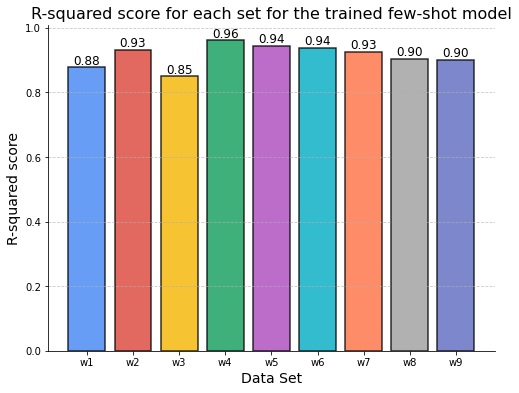

In [340]:
import matplotlib.pyplot as plt



# Extract the weights and scores into separate lists
labels = [w[0] for w in results]
scores = [w[1] for w in results]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create the bar chart
bar_colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC', '#00ACC1', '#FF7043', '#9E9E9E', '#5C6BC0']
ax.bar(labels, scores, color=bar_colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add labels and title
ax.set_xlabel('Data Set', fontsize=14)
ax.set_ylabel('R-squared score', fontsize=14)
ax.set_title('R-squared score for each set for the trained few-shot model', fontsize=16)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for i, v in enumerate(scores):
    ax.text(i, v+0.01, '{:.2f}'.format(v), ha='center', fontsize=12)

# Show the plot
plt.show()


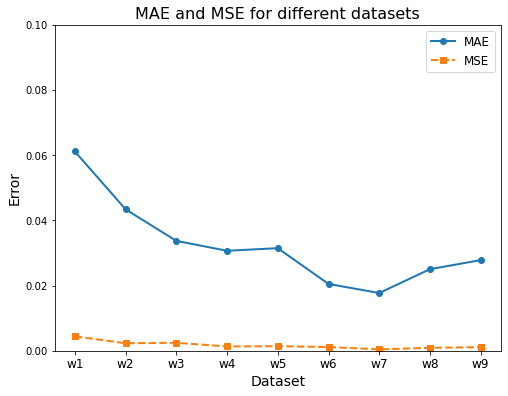

In [304]:
import matplotlib.pyplot as plt

mae_values = [e[0] for e in evaluations]
mse_values = [e[1] for e in evaluations]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mae_values, label='MAE', marker='o', linestyle='-', linewidth=2)
ax.plot(mse_values, label='MSE', marker='s', linestyle='--', linewidth=2)
ax.legend(fontsize=12)
ax.set_xticks(range(len(evaluations)))
ax.set_xticklabels(['w{}'.format(i+1) for i in range(len(evaluations))], fontsize=12)
ax.set_xlabel('Dataset', fontsize=14)
lims = [0.00, 0.1]
plt.ylim(lims)
ax.set_ylabel('Error', fontsize=14)
ax.set_title('MAE and MSE for different datasets', fontsize=16)
plt.show()